<a href="https://colab.research.google.com/github/parthdt/B.Tech-Codes/blob/master/Machine%20Learning/Assignment%201/ML_Assignment1_2017UCS0047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1


### Importing required libraries and the data as pandas dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('complaint.csv')
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Imposed a New Usage Cap of 300GB that punishe...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


### Task 1 - Produce the trend chart about the monthly registered complaints

**First, I extract the month using the `DatetimeIndex().month` value and store it in another column.**  

**Then I group by the month, find each month's number of complaints using `size`, then plot a line chart.**

In [2]:
data['Month'] = pd.DatetimeIndex(data['Date_month_year']).month #Getting months from the Date_month_year col as numbers
data.head() #New column, 'Month' added

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Imposed a New Usage Cap of 300GB that punishe...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


In [3]:
frequencies = data.groupby(['Month']).size() #groupby the month & get frequencies of each
monthly_complaints = pd.DataFrame() 
monthly_complaints['Frequencies'] = frequencies #store the frequencies in this a dataframe
months_in_letters = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] #months in letters
monthly_complaints['Month'] = months_in_letters #Added lettered month col
monthly_complaints

,Frequencies,Month
Month,,
1,52,Jan
2,54,Feb
3,42,Mar
4,351,Apr
5,297,May
6,984,Jun
7,44,Jul
8,61,Aug
9,51,Sep


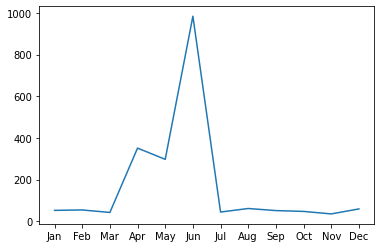

<Figure size 720x360 with 0 Axes>

In [4]:
# monthly_complaints.plot(kind='line', figsize=(10,5))  #For a bigger plot, but without letters
plt.plot(months_in_letters,frequencies)
plt.figure(figsize=(10,5))
plt.show()

### Task 2 - Generate a tabular output with frequencies of complaints

**To do this task, I've used the `value_counts()` method on `Customer Complaint` column.**  
**To print all, we can chain it with the `to_dict()` method or set `display.max_columns` and `display.max_rows` to `None`.**

In [5]:
table1 = pd.DataFrame()
table1['Frequencies'] = data['Customer Complaint'].value_counts() #If frequencies are per complaint ty
table1
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  #Print All method1
#     print(table1)
#data['Customer Complaint'].value_counts().to_dict() #Print all method2

,Frequencies
Internet,18
Data Cap,17
data cap,12
Data Caps,11
Billing,11
...,...
Billing after service was asked to be disconnected,1
Datacaps,1
will not help us please help,1
inability to add service,1


In [6]:
# from difflib import SequenceMatcher

# def similar(a, b):
#     threshold = 0.8
#     return (SequenceMatcher(None, a, b).ratio() > threshold)

# pd.merge(table1['Frequencies'],table1)

**If the frequencies are per month, then I've just used `value_counts` on `Month` column.**

In [7]:
pd.Series(data['Month'].value_counts())

6     984
4     351
5     297
8      61
12     59
2      54
1      52
9      51
10     47
7      44
3      42
11     35
Name: Month, dtype: int64

### Task 3 - Find which complaint types are maximum i.e., internet, network issues, etc.

**After getting the frequencies using `value_counts()`, I've chained it with the `head()` method to get the first few values, i.e. complaints with maximum frequencies.**

In [8]:
#The following are the max complaints, using head here
print("Maximum complaint types and their frequencies:")
pd.DataFrame(data['Customer Complaint'].value_counts().head())

Maximum complaint types and their frequencies:


,Customer Complaint
Internet,18
Data Cap,17
data cap,12
Data Caps,11
Billing,11


### Task 4 - Provide the state wise status of complaint in the form of stacked bar

**To do this, I've refered to [this](https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart) stackoverflow answer.**

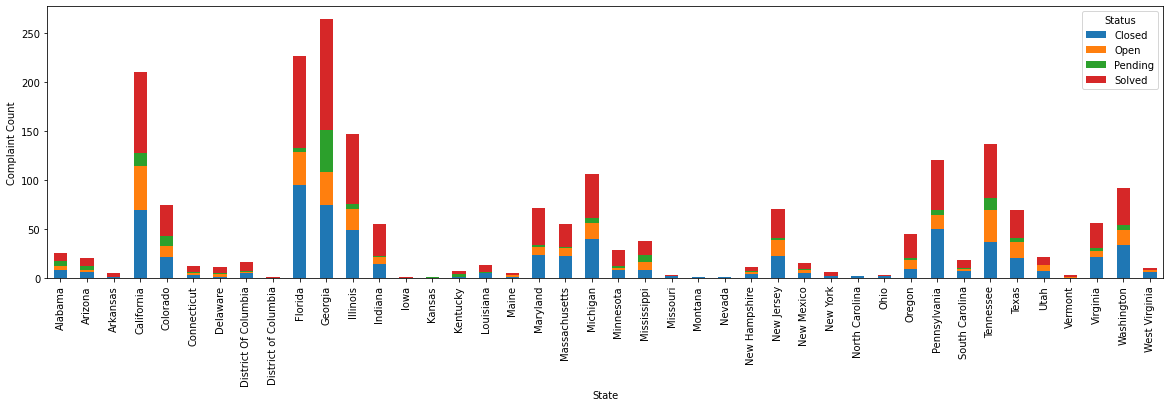

In [9]:
import matplotlib.pyplot as plt
state_wise = data.groupby(['State','Status']).size().unstack().fillna(0) #storing state wise complaints
state_wise.plot(kind='bar',stacked=True, figsize=(20,5)) #Plotting the graph of State wise complaints
plt.ylabel('Complaint Count')
plt.xlabel('State')
# plt.figure(figsize=(100,100))
plt.show()

### Task 5 - Report which state has registered maximum and minimum complaint

**I store the state wise frequencies in a dataframe, and then find `max()` and `min()` valued columns.**  
**We can also use the idxmax and idxmin methods, as found in [this](https://stackoverflow.com/questions/15138973/how-to-get-the-number-of-the-most-frequent-value-in-a-column) stackoverflow answer, but it only gave me the one value.**

In [10]:
state_frequencies = pd.DataFrame(data['State'].value_counts()) #Store frequencies
state_frequencies


,State
Georgia,264
Florida,226
California,210
Illinois,147
Tennessee,137
Pennsylvania,120
Michigan,106
Washington,92
Colorado,75
Maryland,71


In [11]:
print("States where maximum complaints are registered:\n")

state_frequencies[state_frequencies['State'] == state_frequencies['State'].max()] #Max complaints

States where maximum complaints are registered:



,State
Georgia,264


In [12]:
print("States where minimum complaints are registered:\n")

state_frequencies[state_frequencies['State'] == state_frequencies['State'].min()] #Min complaints

States where minimum complaints are registered:



,State
Nevada,1
Iowa,1
Kansas,1
District of Columbia,1
Montana,1


In [13]:
#Alternate
print("State with Maximum Complaints:", data['State'].value_counts().idxmax())
print("State with Minimum Complaints:", data['State'].value_counts().idxmin())

State with Maximum Complaints: Georgia
State with Minimum Complaints: Nevada


### Task 6 - Which state has the highest and lowest percentage of unresolved complaints

**Here, I reuse the `state_wise` dataframe. I sum the total complaints per state, then find the percentages of the unresolved complaints.**


In [14]:
state_wise #Initial state wise dataframe

Status,Closed,Open,Pending,Solved
State,,,,
Alabama,8.0,4.0,5.0,9.0
Arizona,6.0,2.0,4.0,8.0
Arkansas,1.0,0.0,0.0,4.0
California,69.0,45.0,14.0,82.0
Colorado,21.0,12.0,10.0,32.0
Connecticut,3.0,2.0,1.0,6.0
Delaware,1.0,3.0,1.0,6.0
District Of Columbia,5.0,1.0,1.0,9.0
District of Columbia,0.0,0.0,0.0,1.0


In [15]:
state_wise['Total Complaints'] = state_wise.iloc[:,0:].sum(axis=1) #Getting total complaints as sum of all types
state_wise['Resolved Percentage'] = ((state_wise['Closed'] + state_wise['Solved'])/state_wise['Total Complaints']) * 100 #resolved complaints
state_wise['Unresolved Percentage'] = ((state_wise['Open'] + state_wise['Pending'])/state_wise['Total Complaints']) * 100 #Unresolved complaints
state_wise #Modified dataframe

Status,Closed,Open,Pending,Solved,Total Complaints,Resolved Percentage,Unresolved Percentage
State,,,,,,,
Alabama,8.0,4.0,5.0,9.0,26.0,65.384615,34.615385
Arizona,6.0,2.0,4.0,8.0,20.0,70.000000,30.000000
Arkansas,1.0,0.0,0.0,4.0,5.0,100.000000,0.000000
California,69.0,45.0,14.0,82.0,210.0,71.904762,28.095238
Colorado,21.0,12.0,10.0,32.0,75.0,70.666667,29.333333
Connecticut,3.0,2.0,1.0,6.0,12.0,75.000000,25.000000
Delaware,1.0,3.0,1.0,6.0,11.0,63.636364,36.363636
District Of Columbia,5.0,1.0,1.0,9.0,16.0,87.500000,12.500000
District of Columbia,0.0,0.0,0.0,1.0,1.0,100.000000,0.000000


**Now that I've added the percentages, we can find the highest(`max`) and lowest(`min`) unresolved percentages.**

In [16]:
state_wise[state_wise['Unresolved Percentage'] == state_wise['Unresolved Percentage'].max()]

Status,Closed,Open,Pending,Solved,Total Complaints,Resolved Percentage,Unresolved Percentage
State,,,,,,,
Kansas,0.0,0.0,1.0,0.0,1.0,0.0,100.0


In [17]:
state_wise[state_wise['Unresolved Percentage'] == state_wise['Unresolved Percentage'].min()]

Status,Closed,Open,Pending,Solved,Total Complaints,Resolved Percentage,Unresolved Percentage
State,,,,,,,
Arkansas,1.0,0.0,0.0,4.0,5.0,100.0,0.0
District of Columbia,0.0,0.0,0.0,1.0,1.0,100.0,0.0
Iowa,0.0,0.0,0.0,1.0,1.0,100.0,0.0
Missouri,2.0,0.0,0.0,1.0,3.0,100.0,0.0
Montana,1.0,0.0,0.0,0.0,1.0,100.0,0.0
Nevada,1.0,0.0,0.0,0.0,1.0,100.0,0.0
New York,2.0,0.0,0.0,4.0,6.0,100.0,0.0
North Carolina,2.0,0.0,0.0,0.0,2.0,100.0,0.0
Ohio,2.0,0.0,0.0,1.0,3.0,100.0,0.0


# Question 2

### Task 1
